Importing the libraries

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify


Importing the open source online retail dataset

In [5]:
df=pd.read_csv('C:\\Users\\lucky\\Downloads\\Customer_Segmentation\\reatil.csv',encoding= "utf-16 LE")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


Checking the countries for which the dataset is available

In [6]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

Choosing to analyse the customer segmentation for the Switzerland

Extracting the data for Switzerland from the main dataset

In [7]:
df_swiss=df.loc[df['Country'] == 'Switzerland']
df_swiss.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,12/03/2010 10:36:00,2.95,13520.0,Switzerland
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,12/03/2010 10:36:00,1.65,13520.0,Switzerland
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,12/03/2010 10:36:00,1.65,13520.0,Switzerland
5323,536858,20677,PINK POLKADOT BOWL,16,12/03/2010 10:36:00,1.25,13520.0,Switzerland
5324,536858,20750,RED RETROSPOT MINI CASES,2,12/03/2010 10:36:00,7.95,13520.0,Switzerland


Converting Invoice Dates to date time format and making a new column named Amount which tells the total money spent on that invoice

In [8]:
df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce') 
df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["UnitPrice"]
df_swiss.head()

C:\Users\lucky\AppData\Local\Temp\ipykernel_11240\1145358457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swiss['InvoiceDate']= pd.to_datetime(df_swiss['InvoiceDate'],errors='coerce')
C:\Users\lucky\AppData\Local\Temp\ipykernel_11240\1145358457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_swiss["Amount"] = df_swiss["Quantity"] * df_swiss["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
5320,536858,22326,ROUND SNACK BOXES SET OF4 WOODLAND,30,2010-12-03 10:36:00,2.95,13520.0,Switzerland,88.5
5321,536858,22554,PLASTERS IN TIN WOODLAND ANIMALS,36,2010-12-03 10:36:00,1.65,13520.0,Switzerland,59.4
5322,536858,21731,RED TOADSTOOL LED NIGHT LIGHT,24,2010-12-03 10:36:00,1.65,13520.0,Switzerland,39.6
5323,536858,20677,PINK POLKADOT BOWL,16,2010-12-03 10:36:00,1.25,13520.0,Switzerland,20.0
5324,536858,20750,RED RETROSPOT MINI CASES,2,2010-12-03 10:36:00,7.95,13520.0,Switzerland,15.9


Checking the start and end date of the Switzerland dataframe

In [9]:
print('Min{};Max{}'.format(min(df_swiss.InvoiceDate),max(df_swiss.InvoiceDate)))

Min2010-12-03 10:36:00;Max2011-11-29 08:40:00


Creating a Snapshot date which would count the number of days since the Invoice date to a hypothetical date for analysis of the particular customer and add 1 to it so that the initial date is not 0. This would calculate the "Recency"

In [10]:
snapshot_date=max(df_swiss.InvoiceDate)+ datetime.timedelta(days=1)
snapshot_date

Timestamp('2011-11-30 08:40:00')

## RFM ANALYSIS

Making a new dataframe which depicts the Recency. This is a measure that shows the number of days passed since the last purchase.

In [11]:
recency_df = df_swiss.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (snapshot_date - x).days)
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)
recency_df.head()

,CustomerID,Recency
0,12357.0,23
1,12371.0,34
2,12377.0,305
3,12378.0,119
4,12384.0,19


Making a new dataframe which depicts the Frequency. This is a measure of the number of purchases

In [12]:
frequency_df = df_swiss.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12357.0,131
1,12371.0,63
2,12377.0,77
3,12378.0,219
4,12384.0,30


Making a new dataframe named Monetary which depicts the total monetary value spent by the customer.

In [14]:

monetary_df = df_swiss.groupby(by='CustomerID', as_index=False).agg({'Amount': 'sum'})
monetary_df = monetary_df[['CustomerID', 'Amount']]
print(monetary_df.head())


   CustomerID   Amount
0     12357.0  6207.67
1     12371.0  1887.96
2     12377.0  1628.12
3     12378.0  4008.62
4     12384.0   566.16


Merging the three dataframes

In [15]:
temp_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.rename(columns = {'Recency': 'Recency','Frequency': 'Frequency',('Amount', 'Amount'): 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Amount
CustomerID,,,
12357.0,23,131,6207.67
12371.0,34,63,1887.96
12377.0,305,77,1628.12
12378.0,119,219,4008.62
12384.0,19,30,566.16


Checking how skewed the data is

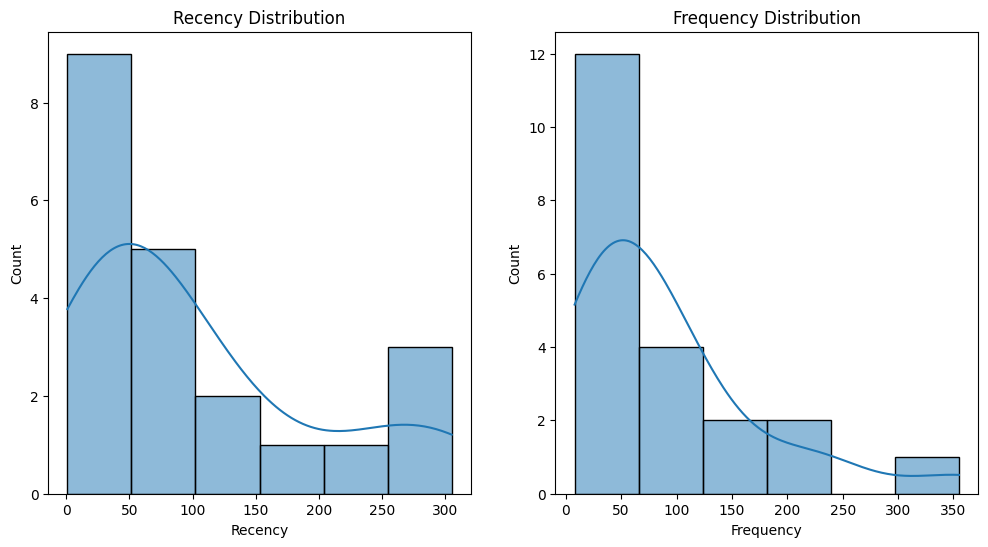

In [18]:
#fig, ax = plt.subplots(1, 3, figsize=(15,3))
#sns.distplot(rfm_df['Recency'], ax=ax[0])
#sns.distplot(rfm_df['Frequency'], ax=ax[1])
#sns.distplot(rfm_df['Monetary'], ax=ax[2])
#plt.tight_layout()
#plt.show()
#..............


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Using histplot for Recency
sns.histplot(rfm_df['Recency'], ax=ax[0], kde=True)
ax[0].set_title('Recency Distribution')

# Using histplot for Frequency
sns.histplot(rfm_df['Frequency'], ax=ax[1], kde=True)
ax[1].set_title('Frequency Distribution')

plt.show()


To manage the skewedness we would divide them in quantiles 

In [19]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Amount
0.25,34.0,34.0,681.08
0.50,61.0,63.0,1628.12
0.75,126.0,114.0,3487.75


Converting it to dict format for easy use

In [20]:
quantiles.to_dict()


{'Recency': {0.25: 34.0, 0.5: 61.0, 0.75: 126.0},
 'Frequency': {0.25: 34.0, 0.5: 63.0, 0.75: 114.0},
 'Amount': {0.25: 681.0799999999999, 0.5: 1628.12, 0.75: 3487.75}}

Assigning the values to the quantiles for easy analysis and same scale
(x = value, p = recency, monetary_value, frequency, d = quartiles dict)

In [23]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

Assigning the quartile value

In [28]:
#rfm_segment = rfm_df#
#rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
#rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
#rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
#rfm_segment.head()
# Check the column names
print(rfm_segment.columns)

# Apply RScore function to Recency column
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency', quantiles,))

# Apply FMScore function to Frequency column
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency', quantiles,))

# Apply FMScore function to Monetary column (ensure the column name is correct)
rfm_segment['M_Quartile'] = rfm_segment['Amount'].apply(FMScore, args=('Amount', quantiles,))

# Display the first few rows of the segmented DataFrame
print(rfm_segment.head())


KeyError: 'Monetary'

Defining the RFM segment as the R, F and M quartile values put together. Defining the RFM score as the sum of the quartile values

In [17]:
rfm_segment['RFM_segment'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment['RFM_score']=rfm_segment[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segment,RFM_score
CustomerID,,,,,,,,
12357.0,23,131,6207.67,4,4,4,444,12
12371.0,34,63,1887.96,4,2,3,423,9
12377.0,305,77,1628.12,1,3,2,132,6
12378.0,119,219,4008.62,2,4,4,244,10
12384.0,19,30,566.16,4,1,1,411,6


Dividing the customers into categories based on their RFM scores

In [18]:
def rfm_level(df):
    if df['RFM_score'] >= 9:
        return 'Best Customers'
    elif ((df['RFM_score'] >= 7) and (df['RFM_score'] < 9)):
        return 'Loyal Customers'
    elif ((df['RFM_score'] >= 5) and (df['RFM_score'] < 7)):
        return 'Promising Customers'
    elif ((df['RFM_score'] >= 4) and (df['RFM_score'] < 5)):
        return 'Need attention'
    else:
        return 'Get better deals for them'
rfm_segment['Customer_type'] = rfm_segment.apply(rfm_level, axis=1)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_segment,RFM_score,Customer_type
CustomerID,,,,,,,,,
12357.0,23,131,6207.67,4,4,4,444,12,Best Customers
12371.0,34,63,1887.96,4,2,3,423,9,Best Customers
12377.0,305,77,1628.12,1,3,2,132,6,Promising Customers
12378.0,119,219,4008.62,2,4,4,244,10,Best Customers
12384.0,19,30,566.16,4,1,1,411,6,Promising Customers


Calculating the average values for each RFM_Level and returning the size of each segment 


In [19]:
rfm_level_agg = rfm_segment.groupby('Customer_type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
rfm_level_agg

Recency Frequency Monetary      
                             mean      mean     mean count
Customer_type                                             
Best Customers               46.7     148.3   4637.6    10
Get better deals for them   238.0      18.0    572.4     3
Loyal Customers              61.0      38.0    947.4     1
Need attention              102.0      34.0    668.6     1
Promising Customers         128.7      44.7   1005.0     6

In [20]:
df_rfm=rfm_level_agg.reset_index()
df_rfm.head()

Customer_type Recency Frequency Monetary      
                                mean      mean     mean count
0             Best Customers    46.7     148.3   4637.6    10
1  Get better deals for them   238.0      18.0    572.4     3
2            Loyal Customers    61.0      38.0    947.4     1
3             Need attention   102.0      34.0    668.6     1
4        Promising Customers   128.7      44.7   1005.0     6

In [21]:
df_rfm = df_rfm.set_axis(['Customer_type', 'RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count'], axis=1, inplace=False)
df_rfm

,Customer_type,RecencyMean,FrequencyMean,MonetaryMean,Count
0,Best Customers,46.7,148.3,4637.6,10
1,Get better deals for them,238.0,18.0,572.4,3
2,Loyal Customers,61.0,38.0,947.4,1
3,Need attention,102.0,34.0,668.6,1
4,Promising Customers,128.7,44.7,1005.0,6


Making a Square plot to analyse the different segments with respect to a whole picture

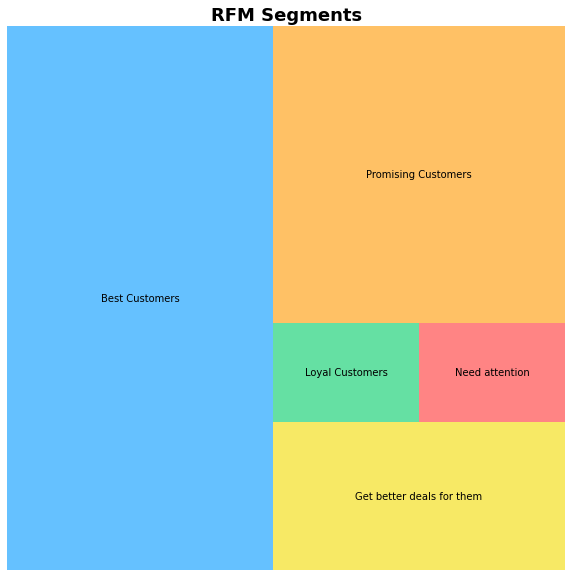

In [22]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10,10)
squarify.plot(sizes=df_rfm['Count'], 
              label=['Best Customers','Get better deals for them','Loyal Customers','Need attention','Promising Customers'], alpha=.6,
              color=['#0099FF', '#F2DB00', '#00CC66', '#FF3333','#FF9900'])
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Making a bubble plot to analyse the counts

In [23]:
fig = go.Figure(data=[go.Scatter(
    x=df_rfm['Count'], y=df_rfm['Customer_type'],
    mode='markers',
    marker=dict(
        color=['#0099FF', '#F2DB00', '#00CC66', '#FF3333','#FF9900'],
        size=[100, 30, 20, 20, 60],
        )
)])
fig.update_layout(
    title='Analysing Customer Segments',
    xaxis=dict(
        title='Count',
        ),
    yaxis=dict(
        title='Customer Segment type',),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

Visualizing the R,F and M individually

In [24]:
labels = df_rfm['Customer_type']
values = df_rfm['RecencyMean']
colors = ['#0099FF', '#FF3333', '#00CC66', '#F2DB00','#FF9900']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0, 0,0])])
fig.update_traces( title="Recency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))

fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [25]:
labels = df_rfm['Customer_type']
values = df_rfm['FrequencyMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Frequency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [26]:
labels = df_rfm['Customer_type']
values = df_rfm['MonetaryMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Monetary Value",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()